# Association Rules

Apply assocation analysis for drawing.

Assocation analysis requires binary data. Thus, first transform ratio to binary.

if ratio >0, 1 (present in the drawing). Otherwise, 0.

also Draw a network graph for association rules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

drawing = pd.read_csv('output.csv')

def findACDCol(df):
    return [col for col in df.columns if col[:4]=='ACDB']

drawing1 = drawing[findACDCol(drawing)].fillna(0)

drawing1=drawing1[drawing1.sum(axis=1)>0]
#drawing1.info() ### count

drawing2=drawing1.div(drawing1.sum(axis=1),axis=0)

#drawing2.info() ### relative

binary=drawing2.applymap(lambda x:1 if x>0 else 0)

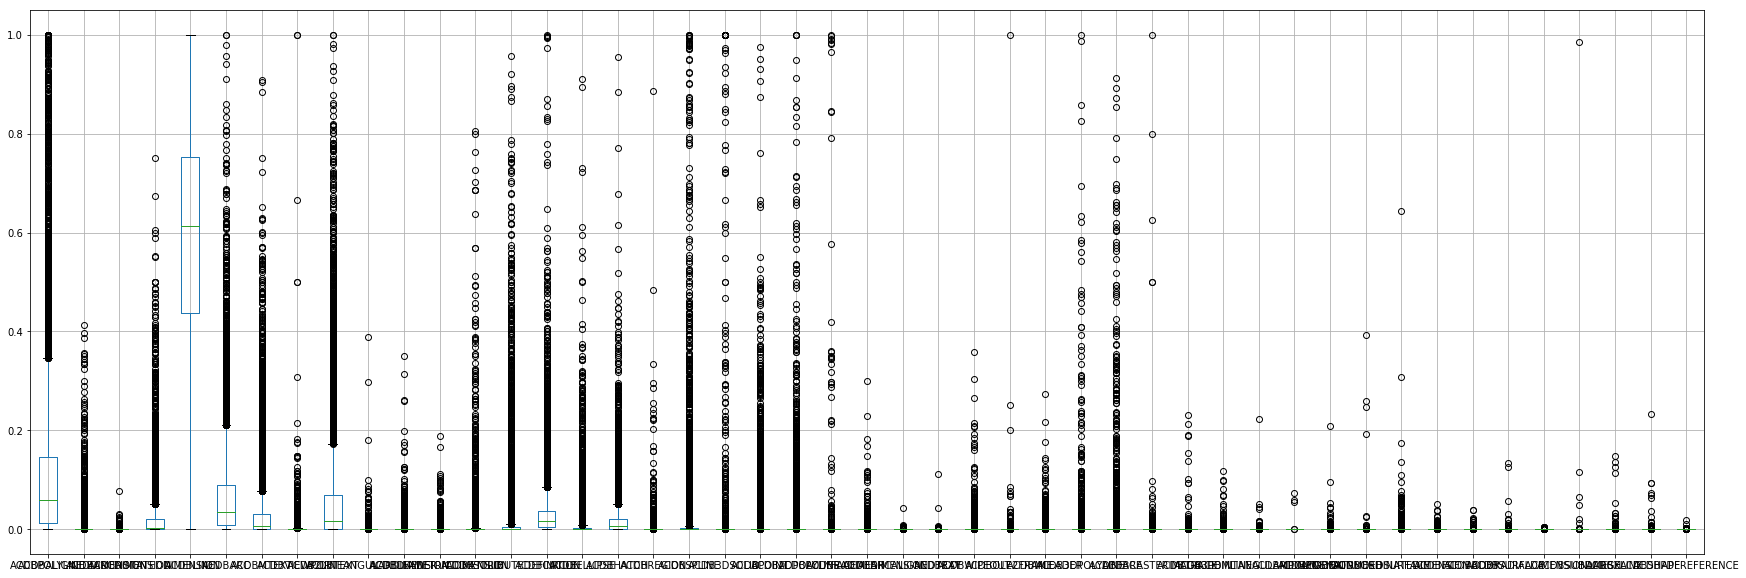

In [3]:
plt.figure(figsize=(30,10))
drawing2.boxplot()

# Binary Data

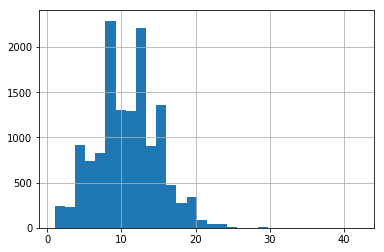

In [44]:
binary.sum(axis=1).hist(bins=30)

In [ ]:
drawing1.sum(axis=1).sort_index

(0, 20000)

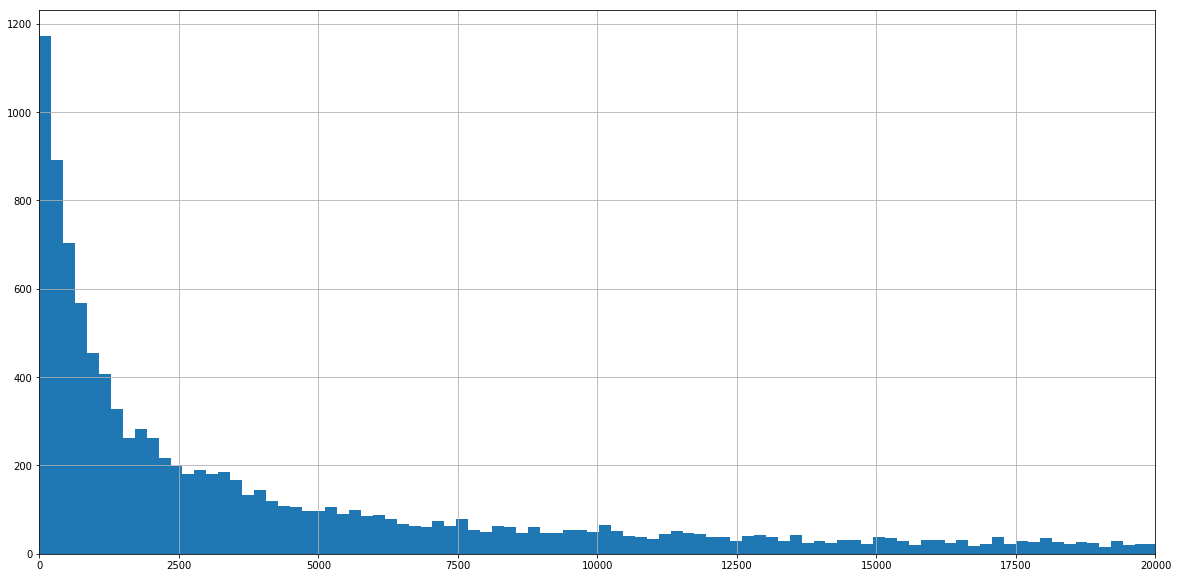

In [45]:
plt.figure(figsize=(20,10))
drawing1.sum(axis=1).hist(bins=10000)
plt.xlim(0, 20000)

(0, 200)

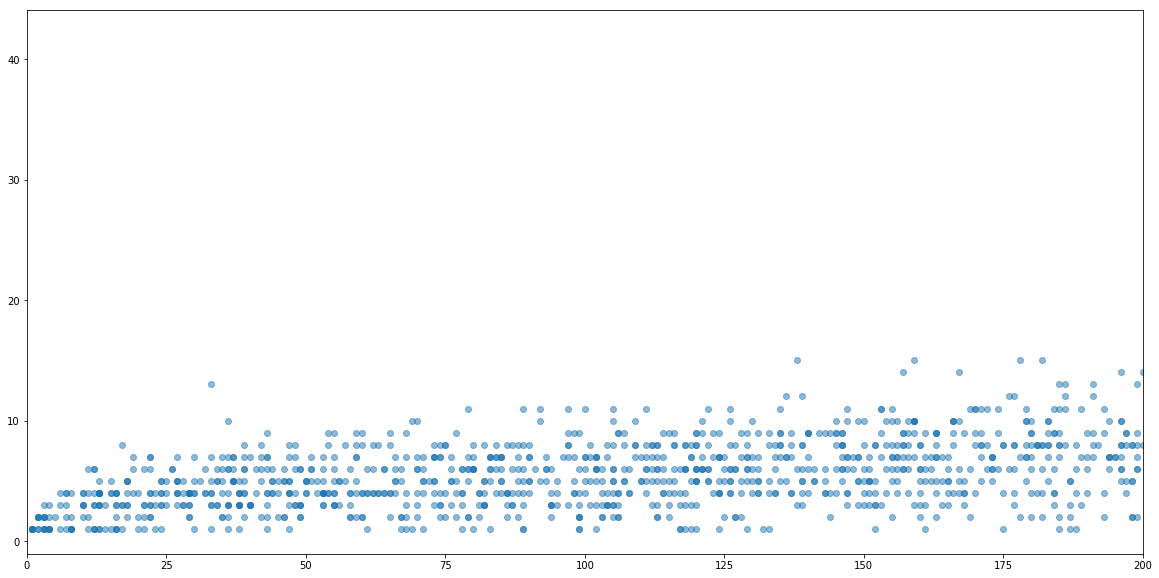

In [53]:
plt.figure(figsize=(20,10))
plt.scatter(drawing1.sum(axis=1),binary.sum(axis=1),alpha=0.5)
plt.xlim(0, 200)

In [69]:
#binary[drawing1.sum(axis=1)<100].sum(axis=1).hist()

#drawing1[binary.sum(axis=1)==1]
#binary[binary.sum(axis=1)==1].sum().where(lambda x:x>0).dropna()
binary[binary.sum(axis=1)==1].sum(axis=1).value_counts()

1    104
dtype: int64

In [94]:
columns = drawing1.columns
def filterNon0(row):
    result={}
    #return (len(row),row[0])
    for i in range(len(row)):
        if row[i]!=0:
            result[columns[i]]=row[i]
    return result
        
        
drawing1[binary.sum(axis=1)==2].query('ACDBLINE==0&ACDBPOLYLINE==0').apply(filterNon0, axis=1)

793                   {'ACDBSPLINE': 2.0, 'ACDBTEXT': 9.0}
931              {'ACDBMTEXT': 15.0, 'ACDB3DSOLID': 110.0}
1697       {'ACDBRASTERIMAGE': 1.0, 'ACDB2DPOLYLINE': 1.0}
2034            {'ACDB3DSOLID': 63.0, 'ACDBVIEWPORT': 2.0}
2696               {'ACDBHATCH': 43.0, 'ACDB3DSOLID': 2.0}
2833        {'ACDBRASTERIMAGE': 4.0, 'ACDBOLE2FRAME': 1.0}
3391         {'ACDBTEXT': 1.0, 'ACDBPOLYFACEMESH': 2798.0}
4853     {'ACDB3DPOLYLINE': 84.0, 'ACDBPOLYFACEMESH': 4...
5283     {'ACDBDIAMETRICDIMENSION': 2.0, 'ACDBCIRCLE': ...
5752               {'ACDBSPLINE': 315.0, 'ACDBMTEXT': 1.0}
5972         {'ACDBRASTERIMAGE': 1.0, 'ACDBVIEWPORT': 1.0}
6289     {'ACDBATTRIBUTEDEFINITION': 161.0, 'ACDBPOLYFA...
6365     {'ACDB3DPOLYLINE': 296.0, 'ACDBPOLYFACEMESH': ...
6856                {'ACDBMTEXT': 1.0, 'ACDB3DSOLID': 1.0}
7231     {'ACDBATTRIBUTEDEFINITION': 230.0, 'ACDBPOLYFA...
7893                 {'ACDBSPLINE': 57.0, 'ACDBTEXT': 1.0}
8449                {'ACDBSPLINE': 369.0, 'ACDBTEXT': 1.

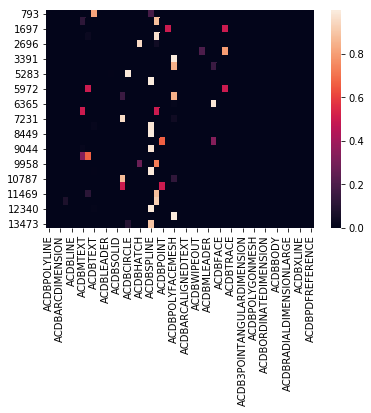

In [93]:
sns.heatmap(drawing2[binary.sum(axis=1)==2].query('ACDBLINE==0&ACDBPOLYLINE==0'))

In [2]:
pd.merge(pd.DataFrame(binary.sum()/binary.shape[0]),
         pd.DataFrame(drawing2.max()), 
         suffixes=['frequency','max'],
         left_index=True, right_index=True).sort_values('0frequency')

#plot.scatter('0frequency','0max')

,0frequency,0max
ACDBMPOLYGON,0.000368,0.072129
ACDBSUBDMESH,0.000957,0.986111
ACDBRADIALDIMENSIONLARGE,0.001913,0.004090
ACDBSHAPE,0.002208,0.232589
ACDBEXTRUDEDSURFACE,0.002502,0.393548
ACDBBODY,0.002576,0.038889
ACDBSURFACE,0.003017,0.133333
ACDBARCALIGNEDTEXT,0.004195,0.042908
ACDBPDFREFERENCE,0.005372,0.018868
ACDBRAY,0.006256,0.111437


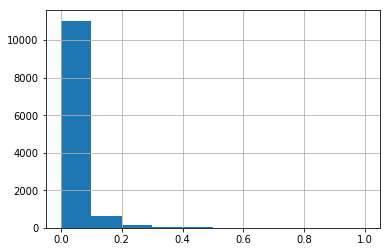

In [22]:
drawing2[drawing2.ACDBCIRCLE>0].ACDBCIRCLE.hist()

In [27]:
(binary.sum()/binary.shape[0]).sort_values(ascending=False)

ACDBLINE                      0.981160
ACDBPOLYLINE                  0.888137
ACDBCIRCLE                    0.876361
ACDBARC                       0.853400
ACDBHATCH                     0.787165
ACDBMTEXT                     0.783338
ACDBTEXT                      0.774728
ACDBROTATEDDIMENSION          0.661319
ACDBVIEWPORT                  0.468870
ACDBELLIPSE                   0.447674
ACDBSPLINE                    0.405726
ACDBATTRIBUTEDEFINITION       0.390786
ACDBSOLID                     0.358037
ACDBPOINT                     0.332867
ACDBALIGNEDDIMENSION          0.317928
ACDBLEADER                    0.298499
ACDB2DPOLYLINE                0.235428
ACDBRASTERIMAGE               0.096409
ACDB2LINEANGULARDIMENSION     0.090963
ACDBRADIALDIMENSION           0.088608
ACDBWIPEOUT                   0.085443
ACDBOLE2FRAME                 0.084707
ACDBMLEADER                   0.083677
ACDB3DPOLYLINE                0.073668
ACDBDIAMETRICDIMENSION        0.070430
ACDBREGION               

## Assocation Rules

In [4]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

frequent_itemsets = apriori(binary, min_support=0.1, use_colnames=True)

In [30]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

,antecedants,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(ACDBPOLYLINE, ACDBSPLINE, ACDBROTATEDDIMENSIO...",(ACDBHATCH),0.134236,0.787165,0.131366,0.978618,1.243219,0.025700,9.954122
1,"(ACDBPOLYLINE, ACDBHATCH, ACDBROTATEDDIMENSION...",(ACDBSPLINE),0.200913,0.405726,0.131366,0.653846,1.611548,0.049851,1.716793
2,"(ACDBPOLYLINE, ACDBHATCH, ACDBROTATEDDIMENSION...",(ACDBPOINT),0.282897,0.332867,0.131366,0.464360,1.395031,0.037199,1.245487
3,"(ACDBSPLINE, ACDBHATCH, ACDBROTATEDDIMENSION, ...",(ACDBPOLYLINE),0.132249,0.888137,0.131366,0.993322,1.118434,0.013911,16.751545
4,"(ACDBPOLYLINE, ACDBSPLINE, ACDBHATCH, ACDBROTA...",(ACDBARC),0.132028,0.853400,0.131366,0.994983,1.165905,0.018693,29.222255


In [36]:
rules[(rules['confidence']<1)&(rules['consequent support']<0.8)]

#rules.sort_values('confidence',ascending=False)

,antecedants,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(ACDBPOLYLINE, ACDBSPLINE, ACDBROTATEDDIMENSIO...",(ACDBHATCH),0.134236,0.787165,0.131366,0.978618,1.243219,0.025700,9.954122
1,"(ACDBPOLYLINE, ACDBHATCH, ACDBROTATEDDIMENSION...",(ACDBSPLINE),0.200913,0.405726,0.131366,0.653846,1.611548,0.049851,1.716793
2,"(ACDBPOLYLINE, ACDBHATCH, ACDBROTATEDDIMENSION...",(ACDBPOINT),0.282897,0.332867,0.131366,0.464360,1.395031,0.037199,1.245487
5,"(ACDBPOLYLINE, ACDBSPLINE, ACDBHATCH, ACDBPOIN...",(ACDBROTATEDDIMENSION),0.161098,0.661319,0.131366,0.815441,1.233053,0.024829,1.835082
6,"(ACDBPOLYLINE, ACDBROTATEDDIMENSION, ACDBPOINT...","(ACDBHATCH, ACDBSPLINE)",0.213056,0.374080,0.131366,0.616580,1.648258,0.051666,1.632467
7,"(ACDBPOLYLINE, ACDBROTATEDDIMENSION, ACDBSPLIN...","(ACDBHATCH, ACDBPOINT)",0.295702,0.293126,0.131366,0.444251,1.515561,0.044688,1.271930
8,"(ACDBPOLYLINE, ACDBHATCH, ACDBROTATEDDIMENSION...","(ACDBSPLINE, ACDBPOINT)",0.507212,0.170812,0.131366,0.258996,1.516259,0.044728,1.119005
9,"(ACDBSPLINE, ACDBROTATEDDIMENSION, ACDBPOINT, ...","(ACDBPOLYLINE, ACDBHATCH)",0.135929,0.742861,0.131366,0.966432,1.300959,0.030390,7.660243
10,"(ACDBHATCH, ACDBROTATEDDIMENSION, ACDBPOINT, A...","(ACDBPOLYLINE, ACDBSPLINE)",0.203709,0.383206,0.131366,0.644870,1.682829,0.053303,1.736812
11,"(ACDBHATCH, ACDBROTATEDDIMENSION, ACDBSPLINE, ...","(ACDBPOLYLINE, ACDBPOINT)",0.293862,0.315646,0.131366,0.447032,1.416245,0.038609,1.237602


## Remove Line and PolyLine

In [5]:
frequent_itemsets = apriori(binary.drop(['ACDBLINE','ACDBPOLYLINE'],axis=1), min_support=0.1, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

,antecedants,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(ACDBSPLINE, ACDBTEXT, ACDBVIEWPORT, ACDBELLIP...",(ACDBMTEXT),0.158228,0.783338,0.151236,0.955814,1.220180,0.027290,4.903398
1,"(ACDBTEXT, ACDBVIEWPORT, ACDBMTEXT, ACDBELLIPS...",(ACDBSPLINE),0.210038,0.405726,0.151236,0.720042,1.774702,0.066018,2.122727
2,"(ACDBSPLINE, ACDBTEXT, ACDBVIEWPORT, ACDBMTEXT...",(ACDBELLIPSE),0.191860,0.447674,0.151236,0.788262,1.760794,0.065345,2.608538
3,"(ACDBSPLINE, ACDBTEXT, ACDBMTEXT, ACDBELLIPSE,...",(ACDBVIEWPORT),0.230277,0.468870,0.151236,0.656759,1.400729,0.043267,1.547399
4,"(ACDBSPLINE, ACDBTEXT, ACDBMTEXT, ACDBELLIPSE,...",(ACDBCIRCLE),0.151825,0.876361,0.151236,0.996122,1.136657,0.018183,31.883279


In [6]:
pd.set_option('display.width', 2000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.expand_frame_repr', False)

rules[rules['confidence']==1].sort_values('confidence',ascending=False)[['antecedants','consequents']]

,antecedants,consequents
5373,"(ACDBELLIPSE, ACDBTEXT, ACDBATTRIBUTEDEFINITIO...",(ACDBCIRCLE)
109817,"(ACDBSPLINE, ACDBARC, ACDBTEXT, ACDBATTRIBUTED...",(ACDBCIRCLE)
185596,"(ACDBELLIPSE, ACDBARC, ACDBATTRIBUTEDEFINITION...",(ACDBCIRCLE)
167369,"(ACDBATTRIBUTEDEFINITION, ACDBELLIPSE, ACDBHAT...",(ACDBCIRCLE)
150193,"(ACDBATTRIBUTEDEFINITION, ACDBELLIPSE, ACDBROT...",(ACDBCIRCLE)
132820,"(ACDBSPLINE, ACDBARC, ACDBMTEXT, ACDBATTRIBUTE...",(ACDBCIRCLE)
116614,"(ACDBSPLINE, ACDBHATCH, ACDBATTRIBUTEDEFINITIO...",(ACDBCIRCLE)
111374,"(ACDBSPLINE, ACDBTEXT, ACDBATTRIBUTEDEFINITION...",(ACDBCIRCLE)
91273,"(ACDBLEADER, ACDBELLIPSE, ACDBROTATEDDIMENSION...",(ACDBCIRCLE)
23434,"(ACDBTEXT, ACDBATTRIBUTEDEFINITION, ACDBELLIPS...",(ACDBCIRCLE)


In [60]:
ant1=rules[rules['confidence']==1].sort_values('confidence',ascending=False)['antecedants'].tolist()

In [67]:
set1=[]

for x in ant1:
    set1+=list(x)

set(set1)

{'ACDBARC',
 'ACDBATTRIBUTEDEFINITION',
 'ACDBELLIPSE',
 'ACDBHATCH',
 'ACDBLEADER',
 'ACDBMTEXT',
 'ACDBROTATEDDIMENSION',
 'ACDBSPLINE',
 'ACDBTEXT'}

In [76]:
rules[(rules['confidence']<1)&(rules['confidence']>0.999454)].sort_values('confidence',ascending=False)[['antecedants','consequents','confidence']]

,antecedants,consequents,confidence
17890,"(ACDBARC, ACDBELLIPSE, ACDBROTATEDDIMENSION, A...",(ACDBCIRCLE),0.999567
28653,"(ACDBSOLID, ACDBHATCH, ACDBELLIPSE, ACDBROTATE...",(ACDBCIRCLE),0.999553
161630,"(ACDBSOLID, ACDBTEXT, ACDBELLIPSE, ACDBROTATED...",(ACDBCIRCLE),0.999549
146838,"(ACDBELLIPSE, ACDBSOLID, ACDBARC, ACDBMTEXT, A...",(ACDBCIRCLE),0.999539
51933,"(ACDBTEXT, ACDBROTATEDDIMENSION, ACDBARC, ACDB...",(ACDBCIRCLE),0.999538
116781,"(ACDBMTEXT, ACDBROTATEDDIMENSION, ACDBARC, ACD...",(ACDBCIRCLE),0.999526
36362,"(ACDBSOLID, ACDBTEXT, ACDBELLIPSE, ACDBMTEXT, ...",(ACDBCIRCLE),0.999521
185590,"(ACDBTEXT, ACDBMTEXT, ACDBROTATEDDIMENSION, AC...",(ACDBCIRCLE),0.999519
82715,"(ACDBTEXT, ACDBMTEXT, ACDBROTATEDDIMENSION, AC...",(ACDBCIRCLE),0.999510
81837,"(ACDBTEXT, ACDBMTEXT, ACDBROTATEDDIMENSION, AC...",(ACDBCIRCLE),0.999508


In [16]:
ant2=rules[(rules['confidence']>0)&(rules['antecedants'].apply(len)==1)&(rules['consequents'].apply(len)==1)].sort_values('confidence',ascending=False)
ant2.head()

,antecedants,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
177774,(ACDBELLIPSE),(ACDBCIRCLE),0.447674,0.876361,0.438034,0.978465,1.116508,0.045709,5.741168
28237,(ACDBELLIPSE),(ACDBARC),0.447674,0.853400,0.436194,0.974355,1.141733,0.054148,5.716458
79998,(ACDBSOLID),(ACDBCIRCLE),0.358037,0.876361,0.347807,0.971429,1.108479,0.034037,4.327348
127982,(ACDBLEADER),(ACDBCIRCLE),0.298499,0.876361,0.289299,0.969181,1.105915,0.027707,4.011822
152762,(ACDB2DPOLYLINE),(ACDBCIRCLE),0.235428,0.876361,0.227775,0.967490,1.103985,0.021454,3.803073


In [281]:
'ACDBARC' in rules['antecedants'][0]

True

In [287]:
def findRuleAnt(element,confidence=0.7):
    ant3=rules[(rules['antecedants'].apply(lambda x: element in x))&(rules['confidence']>confidence)&(rules['antecedants'].apply(len)==1)&(rules['consequents'].apply(len)==1)].sort_values('confidence',ascending=False)
    return ant3

In [18]:
import networkx as nx

def drawNetwork(ant2):
    G1 = nx.DiGraph()

    for index, row in ant2.iterrows():
        G1.add_node(list(row['antecedants'])[0],weight=round(row['antecedent support'],3))
        G1.add_node(list(row['consequents'])[0],weight=round(row['consequent support'],3))
        G1.add_edge(list(row['antecedants'])[0],list(row['consequents'])[0],
                   weight=round(row['confidence'],3))
    #G=nx.from_pandas_edgelist(ant2, 'antecedants', 'consequents', ['confidence'])
    f, ax = plt.subplots(figsize=(20,20))

    # further stuff


    #plt.figure(figsize=(20,20))
    pos = nx.spring_layout(G1)
    #nx.draw_networkx_edges(G1, pos, arrows=True)
    #nx.draw(G1,pos=pos,with_labels = True,arrows=True)
    #nx.draw_networkx_edges(G1,pos)
    edges=G1.edges()
    #colors = [G[u][v]['color'] for u,v in edges]
    #weights = [G[u][v]['weight'] for u,v in edges]
    labels = nx.get_edge_attributes(G1,'weight')
    node_weight=[150*nx.get_node_attributes(G1,'weight')[key] for key in G1.nodes]
    val_map=nx.get_node_attributes(G1,'weight')
    values= [val_map.get(node, 0.25) for node in G1.nodes()]


    #nx.draw(G1, cmap=plt.get_cmap('jet'), node_color=values)
    nx.draw_networkx_nodes(G1, pos, cmap=plt.get_cmap('jet'),
                           node_size = 100,node_color=values,ax=ax)
    nx.draw_networkx_labels(G1, pos,ax=ax)
    #nx.draw_networkx_edges(G1, pos, edgelist=G1.edges(), arrows=True)
    nx.draw_networkx_edges(G1, pos,edgelist=edges, edge_color='b', arrows=True,ax=ax)
    #nx.draw_networkx_edge_labels(G1,pos,edge_labels=labels,ax=ax)

    sm = plt.cm.ScalarMappable(cmap=plt.get_cmap('jet'))
    sm._A = []
    plt.colorbar(sm)
    return f

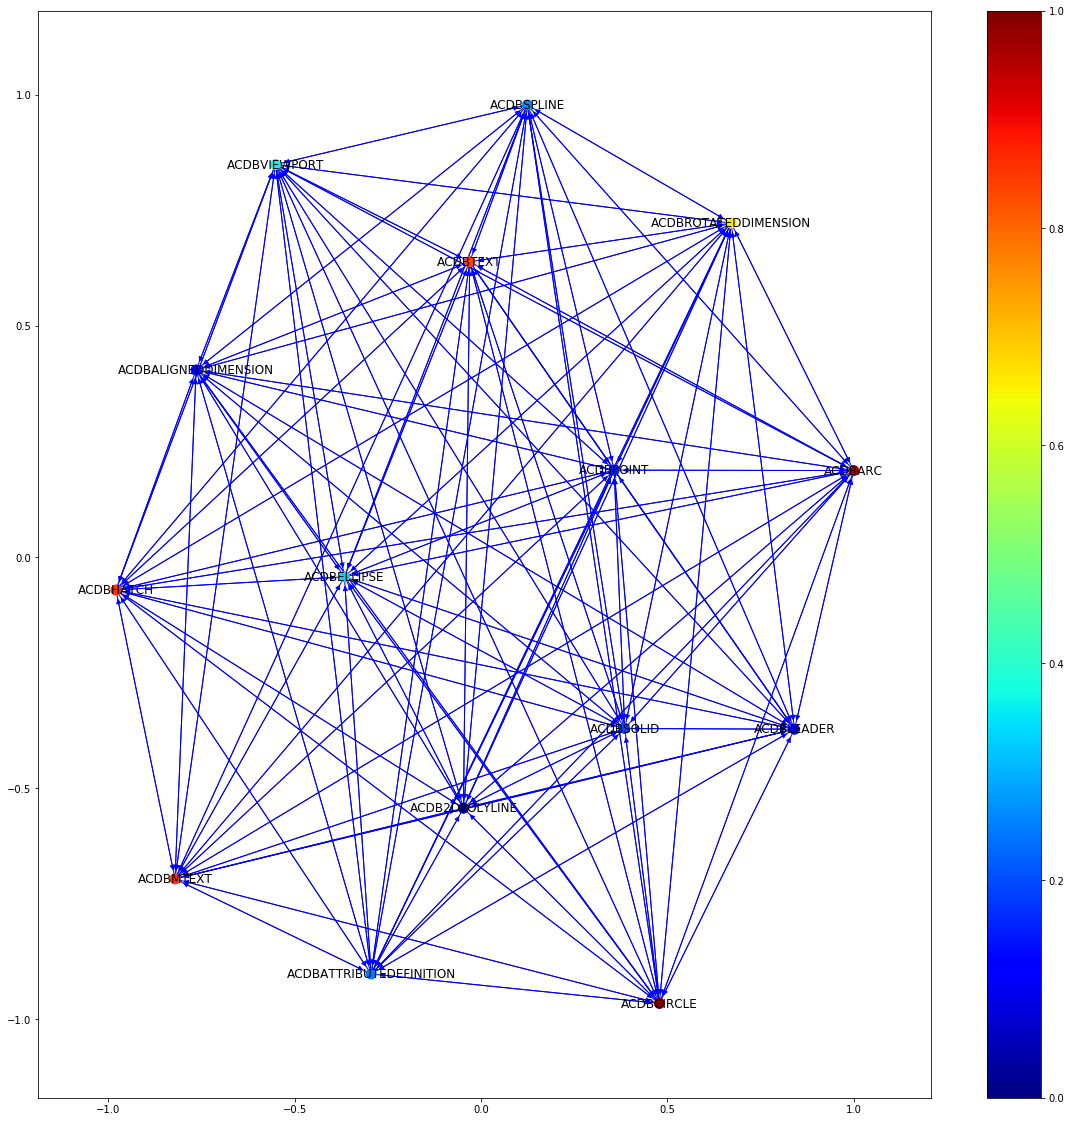

In [19]:
drawNetwork(ant2);

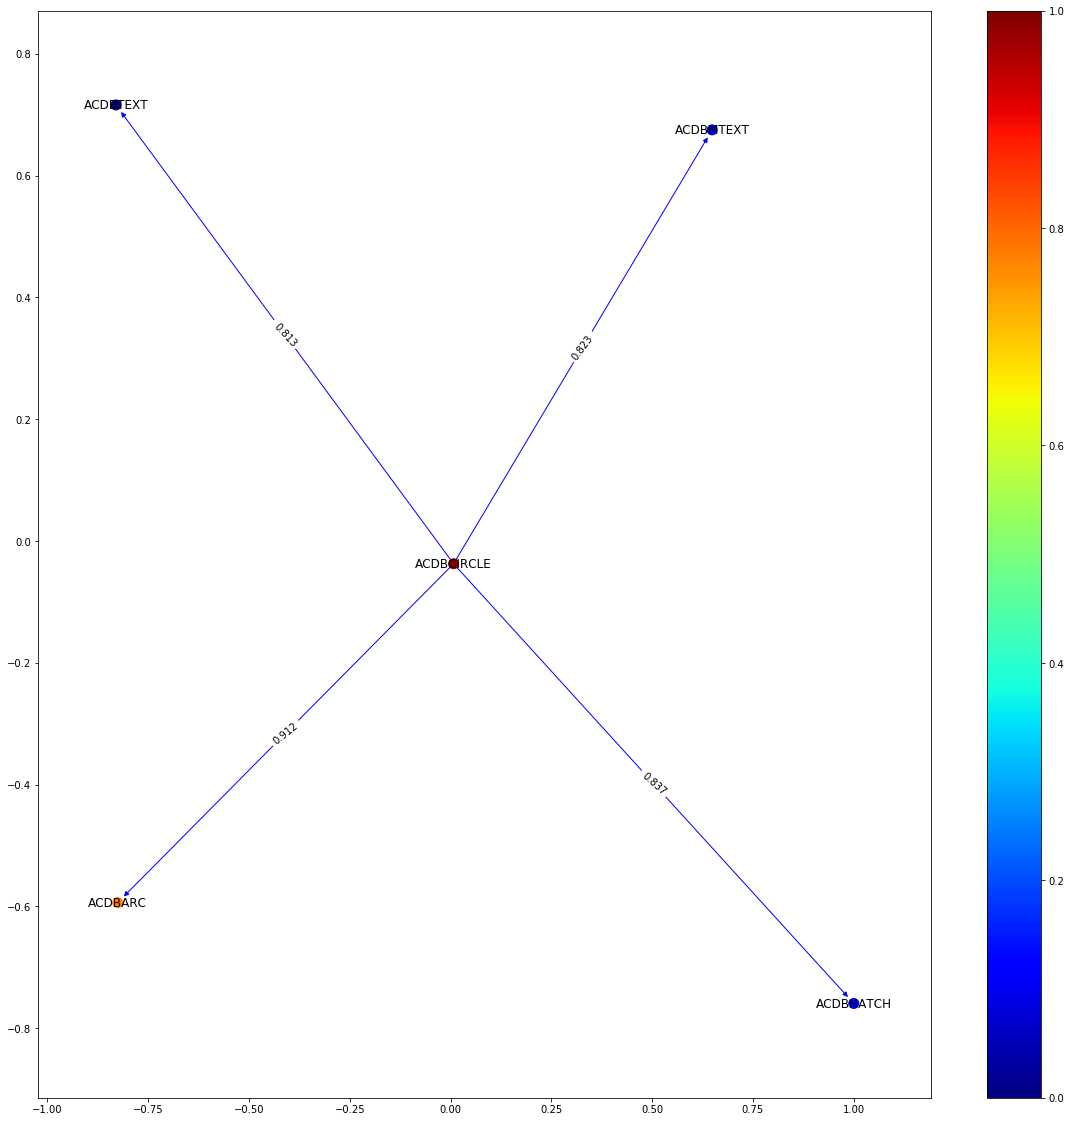

In [313]:
ax

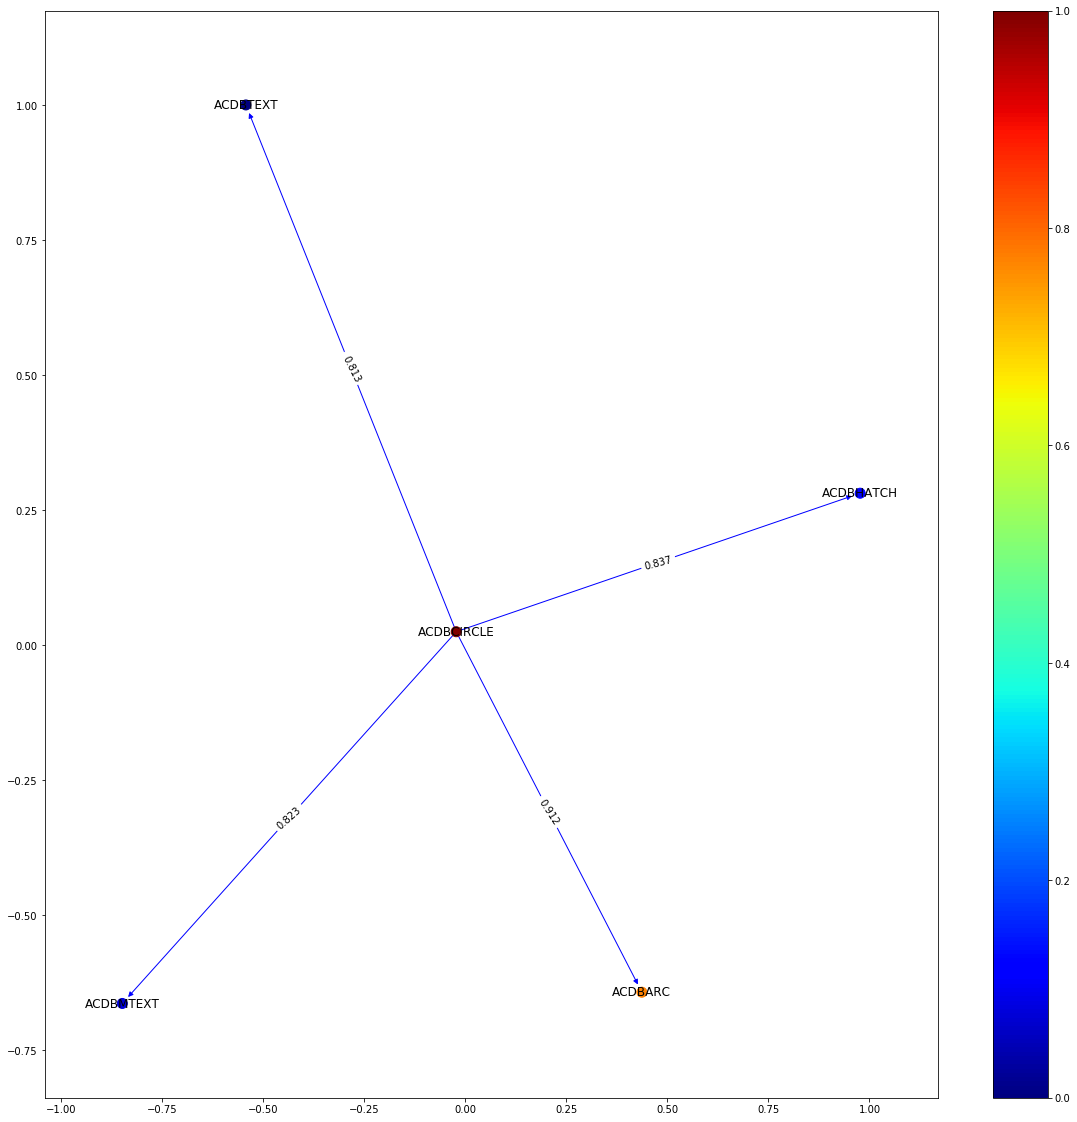

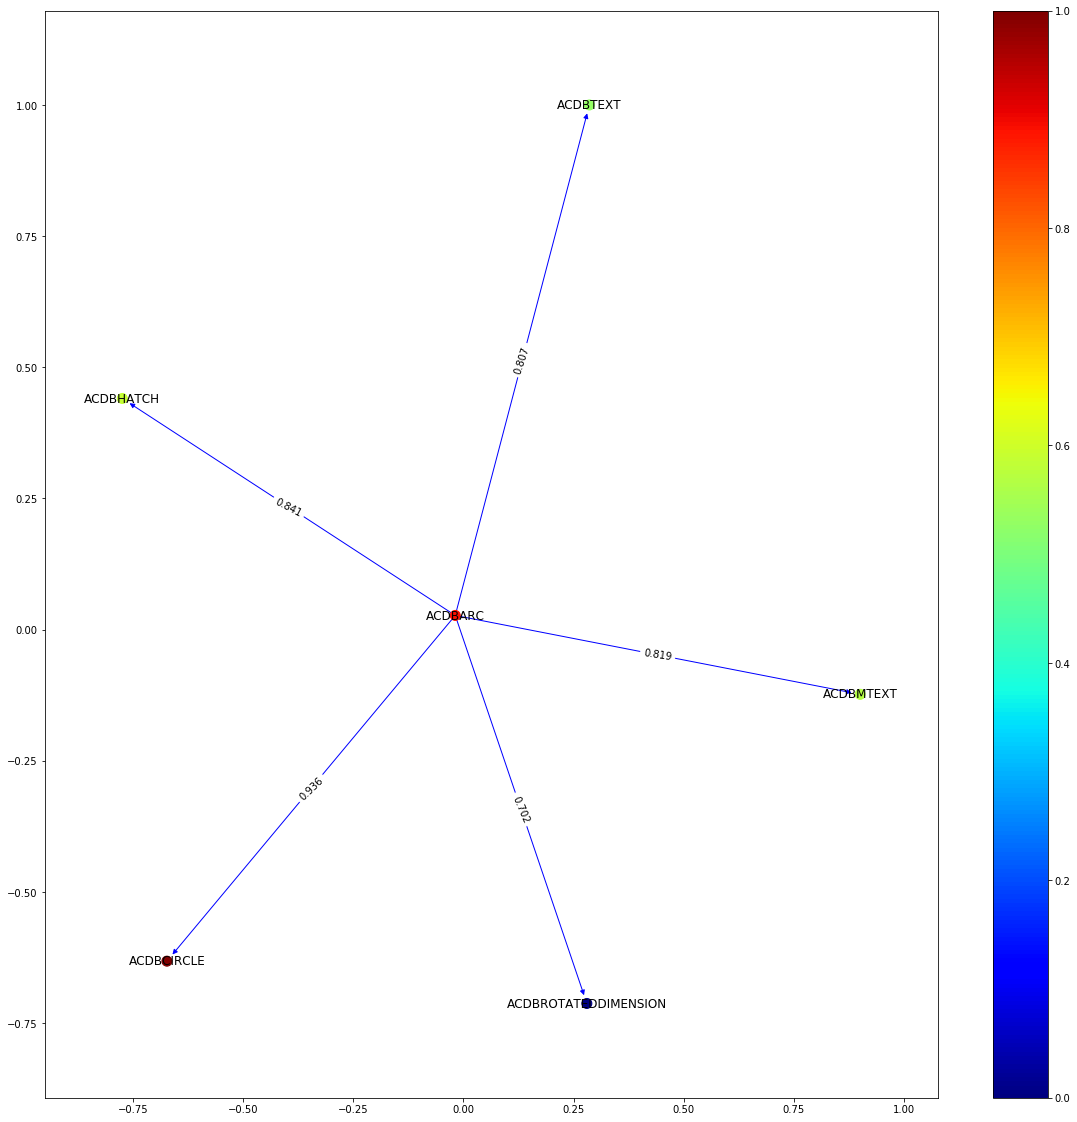

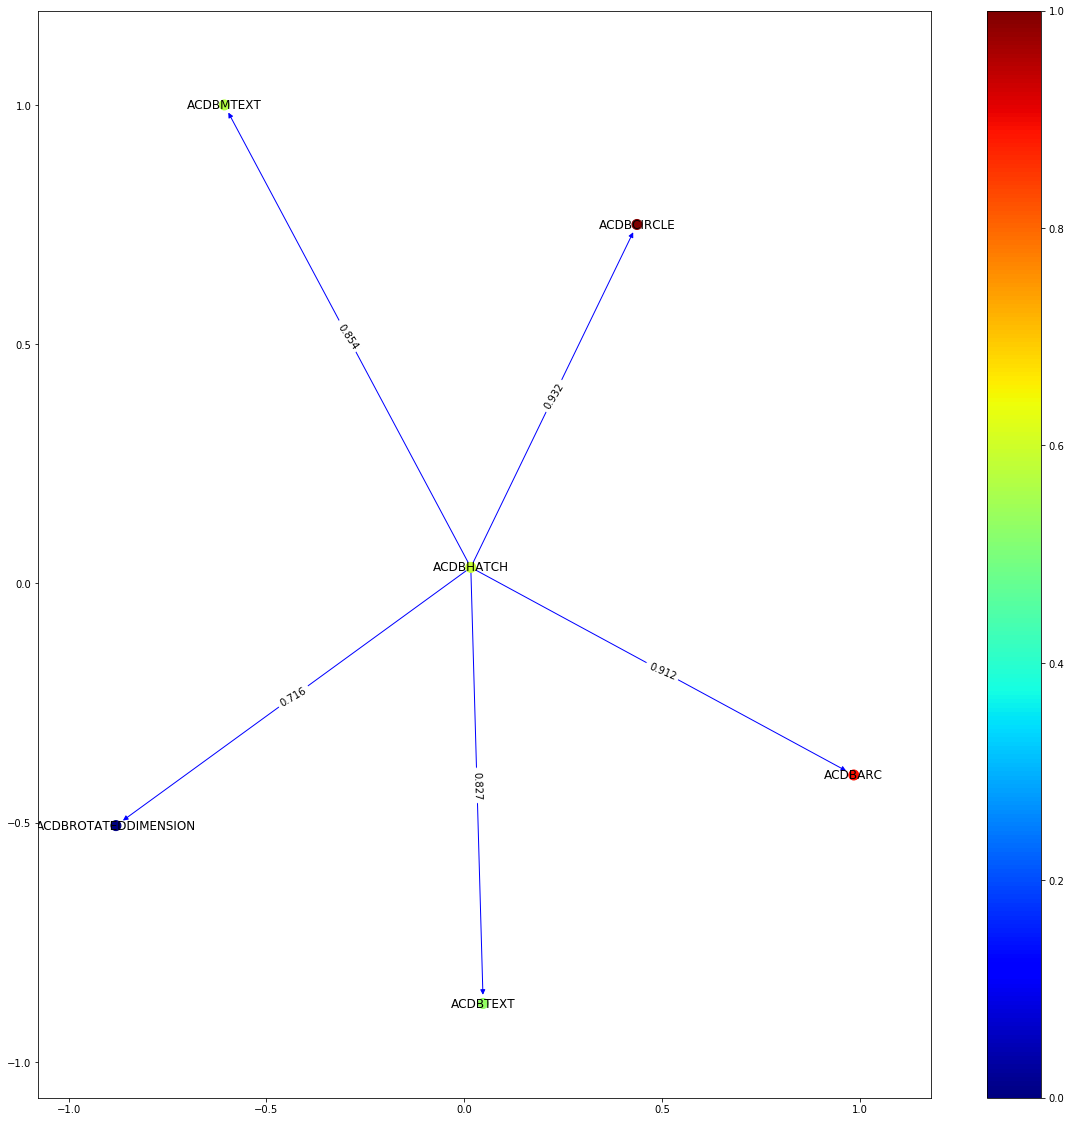

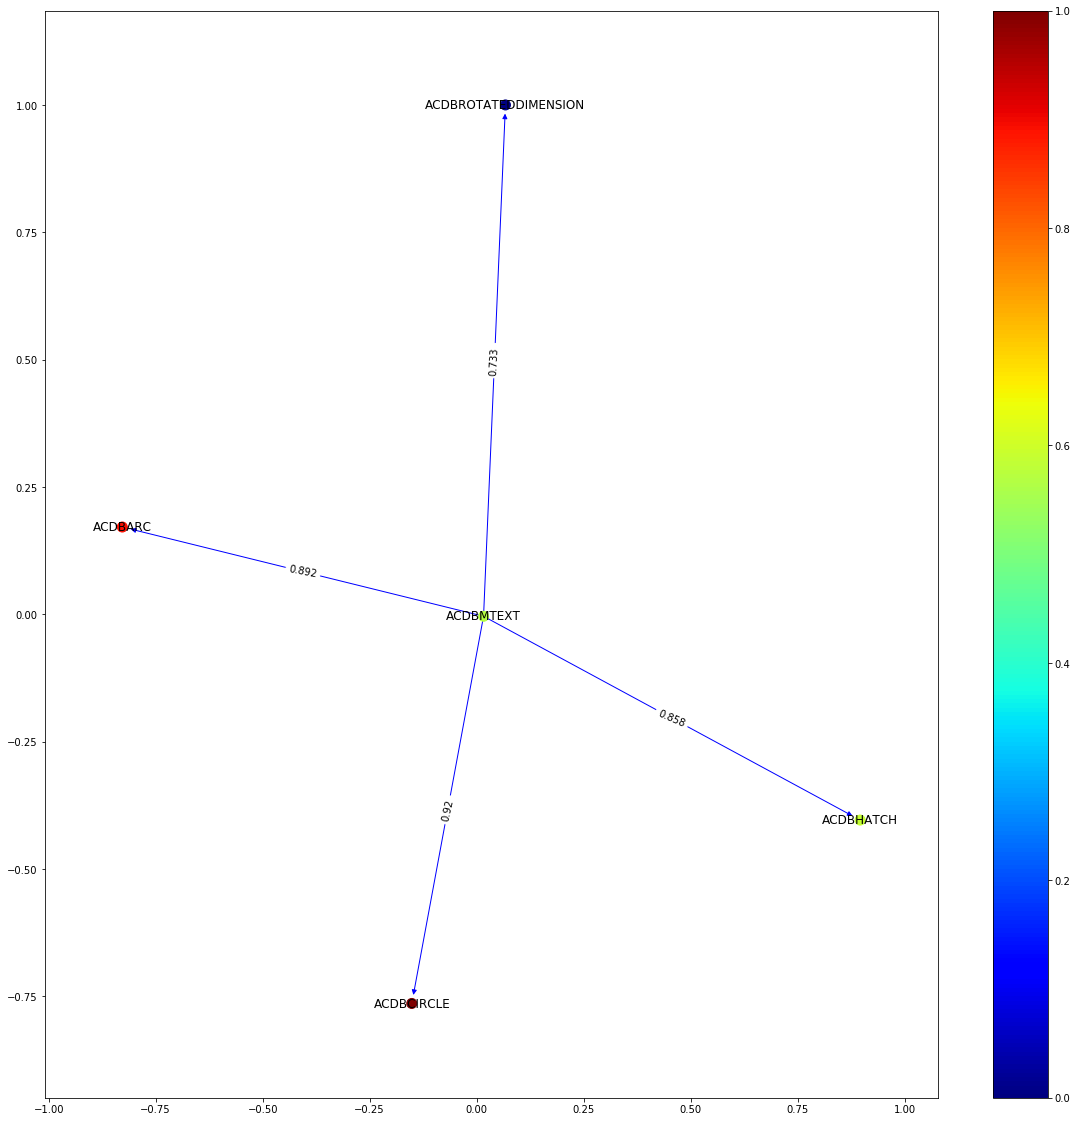

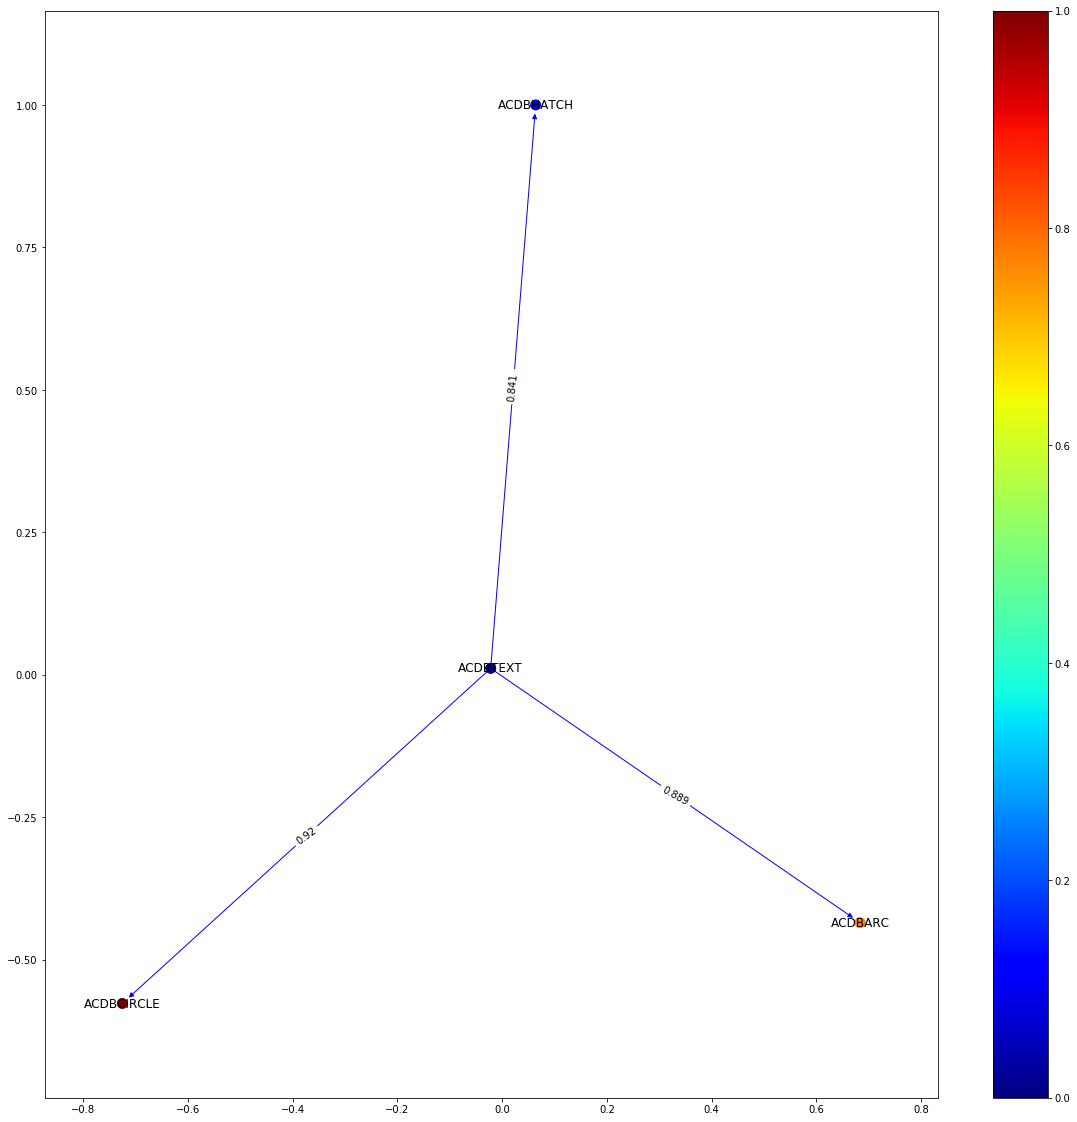

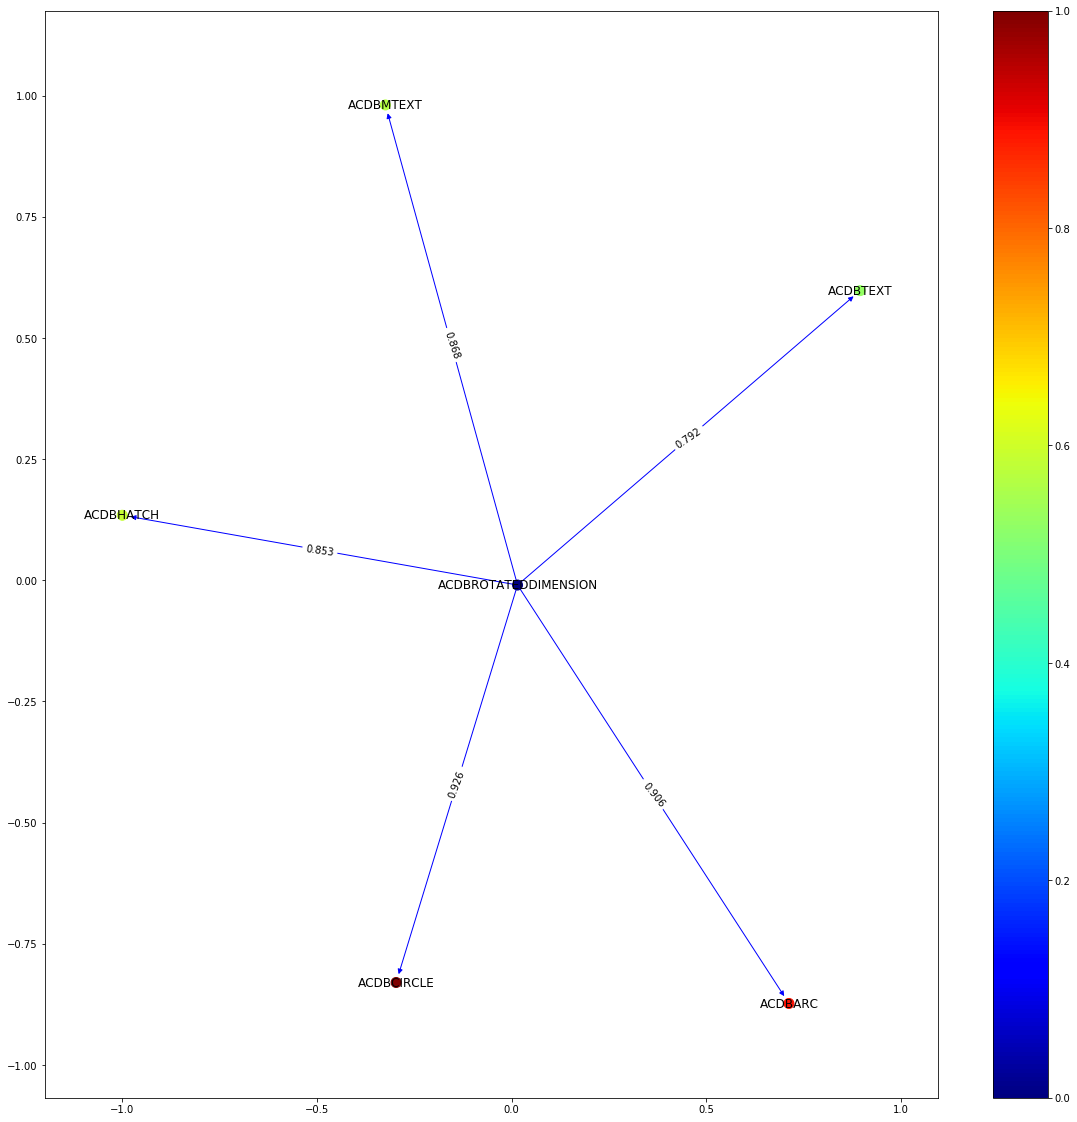

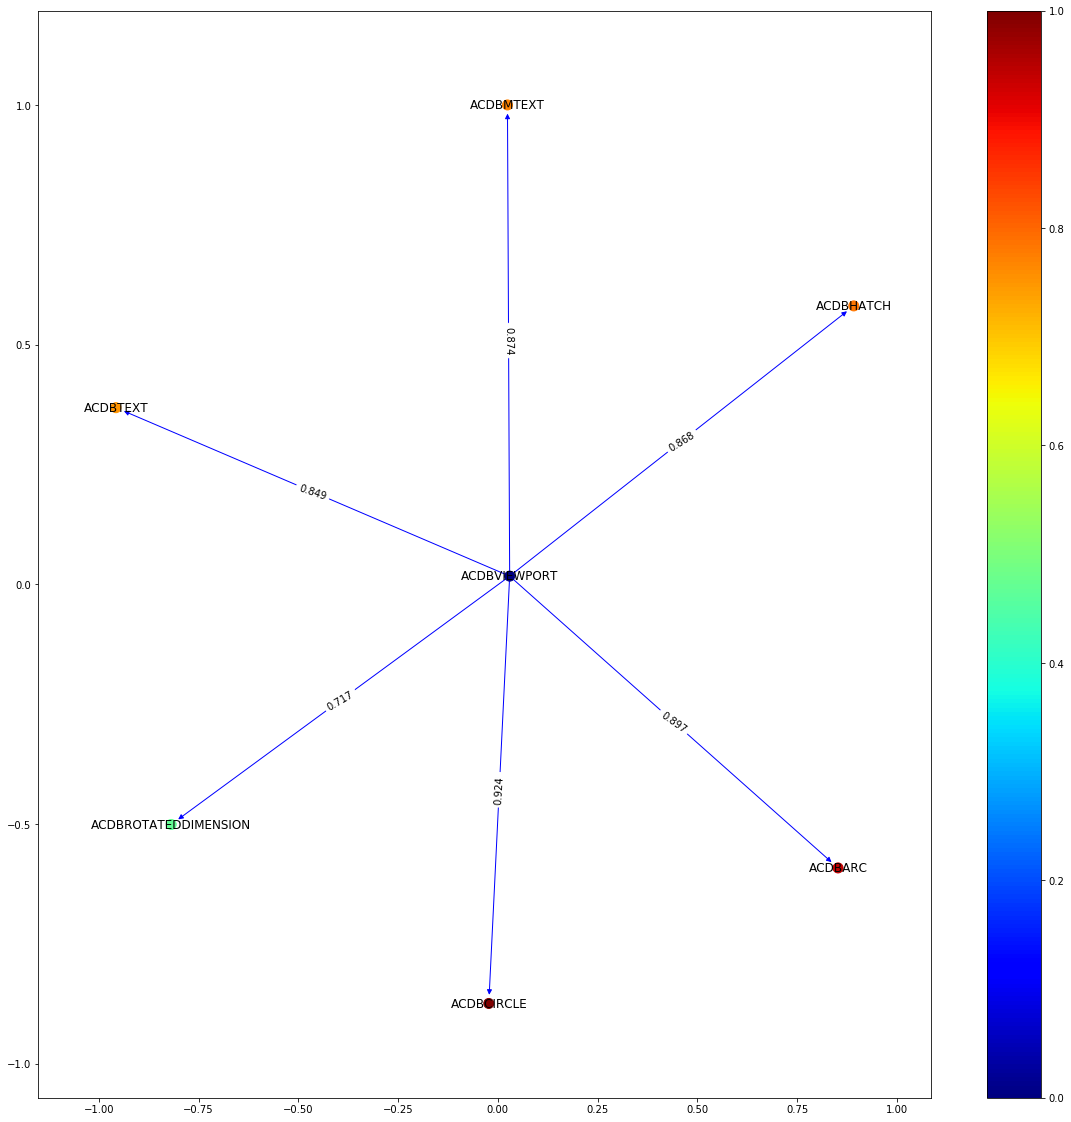

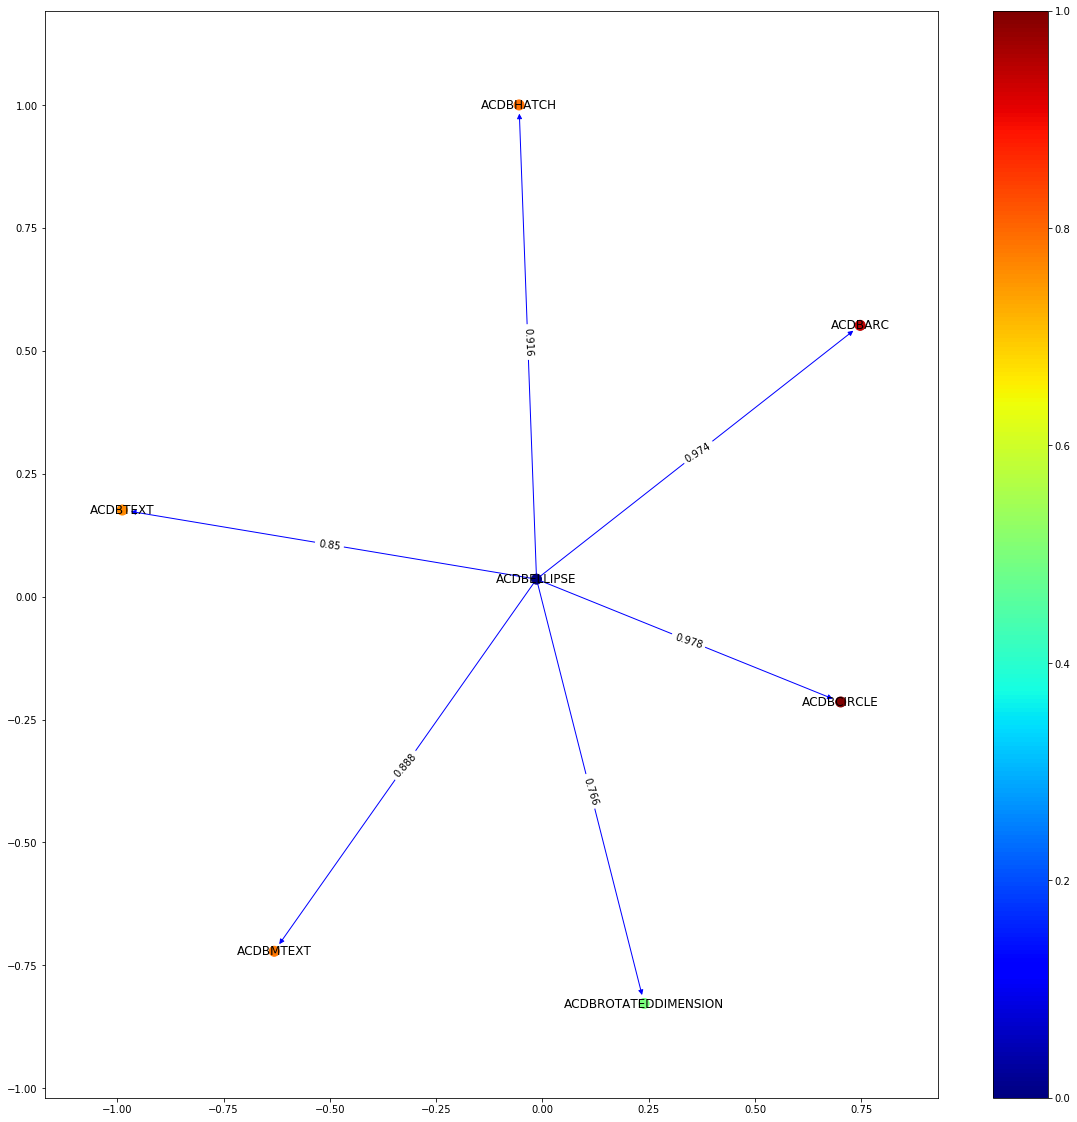

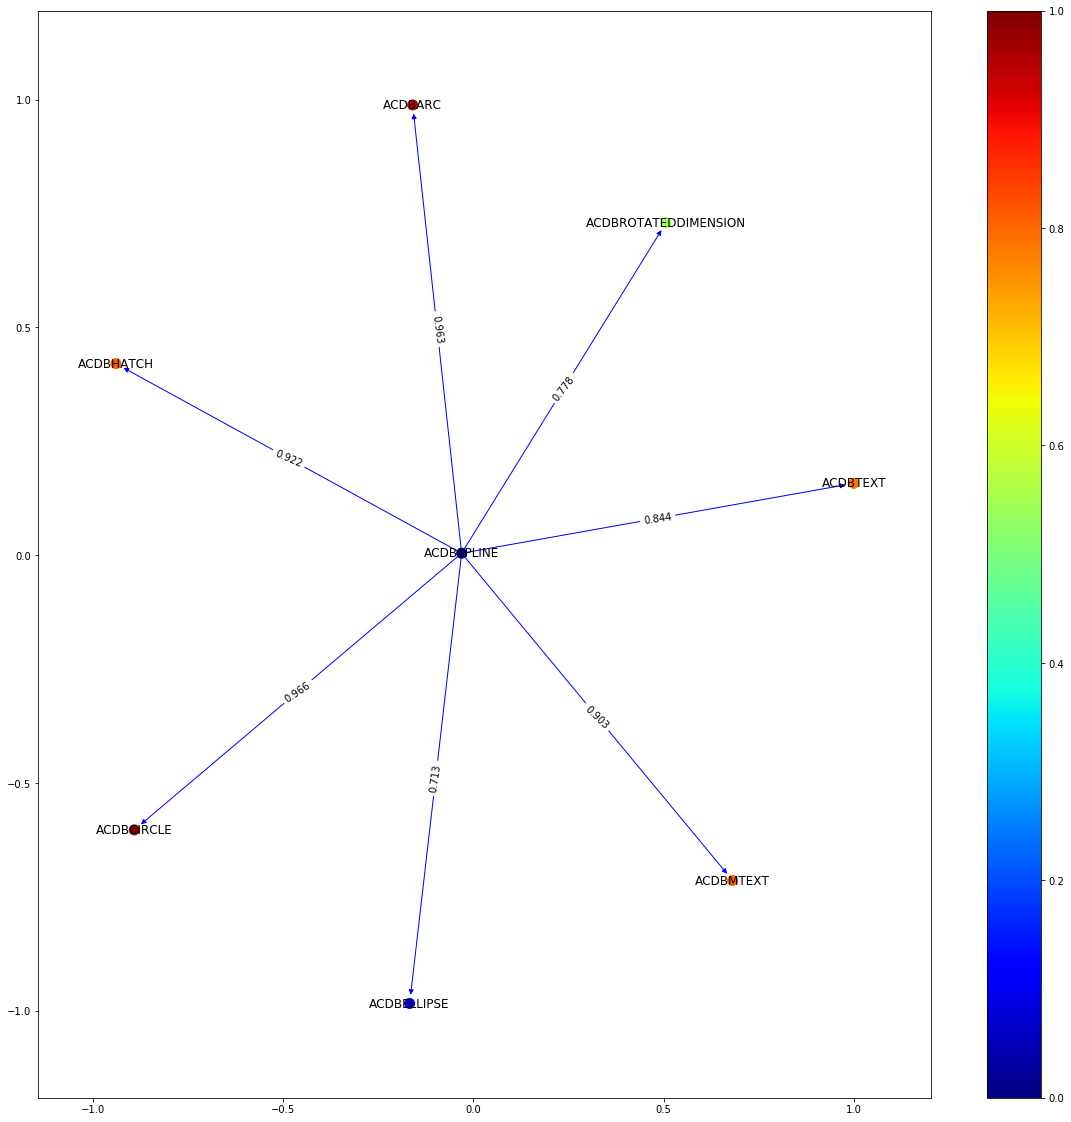

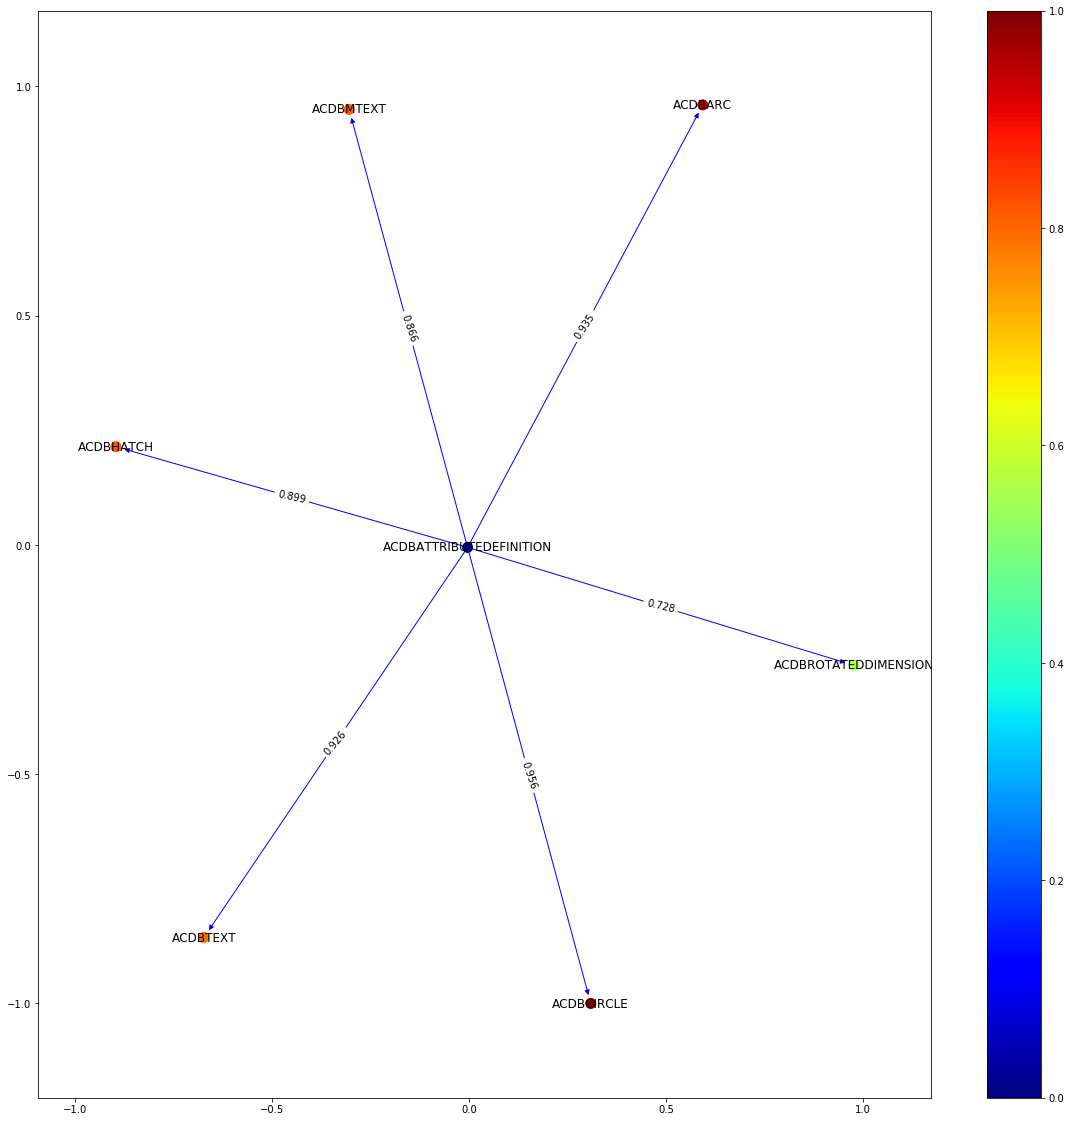

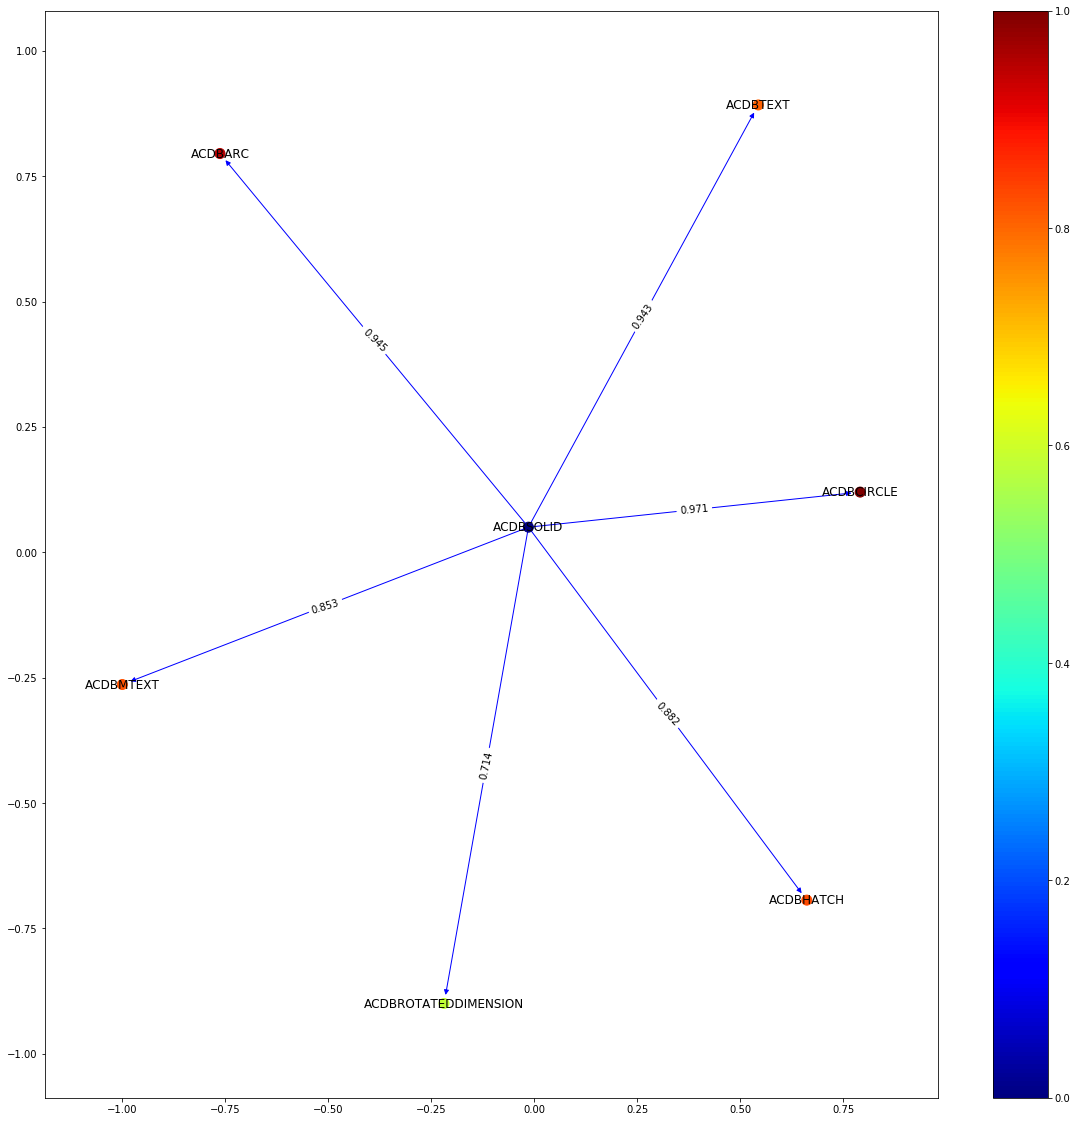

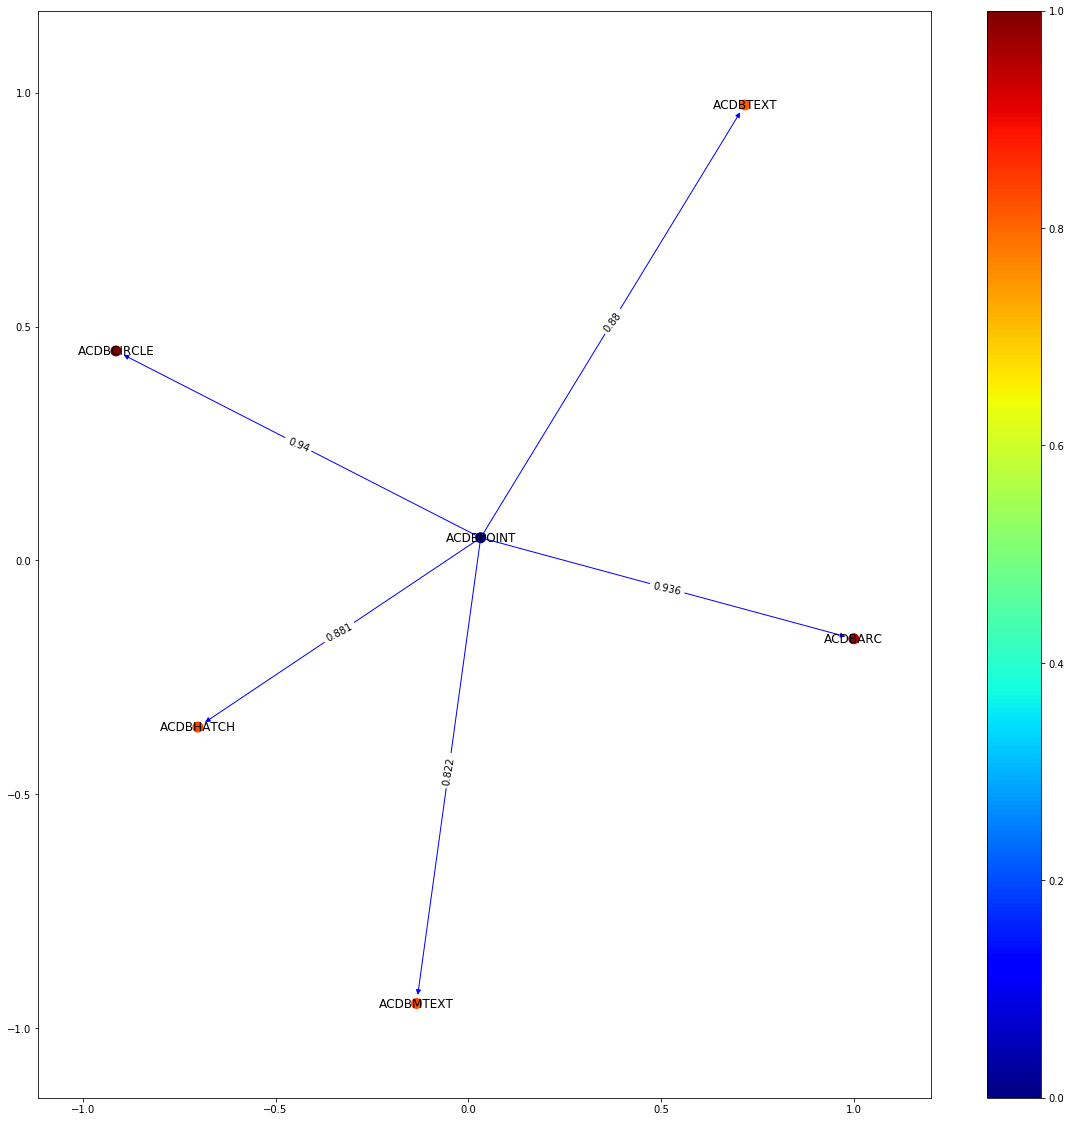

In [314]:
#drawNetwork(ant2)
#drawNetwork(ant3)
element_list=['ACDBCIRCLE', 
              'ACDBARC', 'ACDBHATCH', 'ACDBMTEXT', 
              'ACDBTEXT', 'ACDBROTATEDDIMENSION', 'ACDBVIEWPORT', 
              'ACDBELLIPSE', 'ACDBSPLINE', 'ACDBATTRIBUTEDEFINITION', 
              'ACDBSOLID', 'ACDBPOINT']

import matplotlib.backends.backend_pdf
pdf = matplotlib.backends.backend_pdf.PdfPages("element graph.pdf")

for i in range(len(element_list)):
    pdf.savefig(drawNetwork(findRuleAnt(element_list[i])))
pdf.close()    


# find single once

In [227]:
((binary.sum(axis=1)).value_counts().sort_index()/(binary.sum(axis=1)).value_counts().sum()).cumsum()

1     0.007654
2     0.018104
3     0.034957
4     0.067044
5     0.102223
6     0.156756
7     0.217692
8     0.292832
9     0.386297
10    0.481969
11    0.577421
12    0.663453
13    0.739770
14    0.806447
15    0.863188
16    0.906094
17    0.940536
18    0.960995
19    0.975052
20    0.985723
21    0.991757
22    0.994922
23    0.997277
24    0.998381
25    0.999043
26    0.999264
27    0.999338
28    0.999411
29    0.999706
31    0.999853
39    0.999926
42    1.000000
dtype: float64

In [230]:
binary[binary.sum(axis=1)==1].sum()

ACDBPOLYLINE                  12
ACDBALIGNEDDIMENSION           0
ACDBARCDIMENSION               0
ACDBROTATEDDIMENSION           0
ACDBLINE                      57
ACDBARC                        2
ACDBMTEXT                      0
ACDBVIEWPORT                   2
ACDBTEXT                       2
ACDB2LINEANGULARDIMENSION      0
ACDBLEADER                     0
ACDBDIAMETRICDIMENSION         0
ACDBSOLID                      0
ACDBATTRIBUTEDEFINITION        0
ACDBCIRCLE                     1
ACDBELLIPSE                    0
ACDBHATCH                      0
ACDBREGION                     0
ACDBSPLINE                     3
ACDB3DSOLID                   18
ACDBPOINT                      0
ACDB2DPOLYLINE                 4
ACDBPOLYFACEMESH               0
ACDBRADIALDIMENSION            0
ACDBARCALIGNEDTEXT             0
ACDBRAY                        0
ACDBWIPEOUT                    0
ACDBOLE2FRAME                  1
ACDBMLEADER                    0
ACDB3DPOLYLINE                 1
ACDBFACE  

In [238]:
drawing2.describe().T.drop('count',axis=1)

,mean,std,min,25%,50%,75%,max
ACDBPOLYLINE,0.114135,0.158190,0.0,0.013333,0.058839,0.146389,1.000000
ACDBALIGNEDDIMENSION,0.003130,0.018026,0.0,0.000000,0.000000,0.000205,0.412844
ACDBARCDIMENSION,0.000035,0.000908,0.0,0.000000,0.000000,0.000000,0.077725
ACDBROTATEDDIMENSION,0.020611,0.047246,0.0,0.000000,0.002704,0.020588,0.750000
ACDBLINE,0.577619,0.239538,0.0,0.437500,0.613275,0.753093,1.000000
ACDBARC,0.065363,0.089857,0.0,0.007351,0.034905,0.088376,1.000000
ACDBMTEXT,0.030991,0.064489,0.0,0.000256,0.006370,0.030749,0.908815
ACDBVIEWPORT,0.001814,0.016615,0.0,0.000000,0.000000,0.000543,1.000000
ACDBTEXT,0.059488,0.104927,0.0,0.000479,0.016618,0.069519,1.000000
ACDB2LINEANGULARDIMENSION,0.000341,0.005211,0.0,0.000000,0.000000,0.000000,0.388889


(0, 0.01)

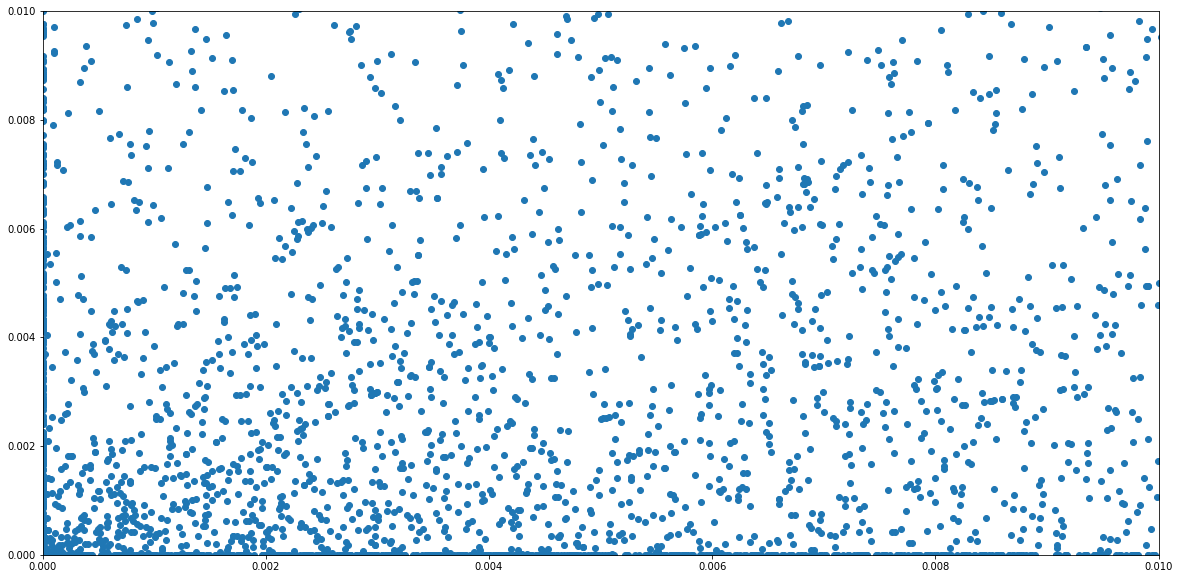

In [242]:
plt.figure(figsize=(20,10))
plt.scatter(drawing2.ACDBCIRCLE,drawing2.ACDBHATCH)
plt.xlim(0, 0.01)
plt.ylim(0, 0.01)

In [290]:
pd.merge(pd.DataFrame(binary.sum()),
         pd.DataFrame(drawing2.max()), 
         suffixes=['frequency','max'],
         left_index=True, right_index=True).sort_values('0frequency',ascending=False).index

Index(['ACDBLINE', 'ACDBPOLYLINE', 'ACDBCIRCLE', 'ACDBARC', 'ACDBHATCH', 'ACDBMTEXT', 'ACDBTEXT', 'ACDBROTATEDDIMENSION', 'ACDBVIEWPORT', 'ACDBELLIPSE', 'ACDBSPLINE', 'ACDBATTRIBUTEDEFINITION', 'ACDBSOLID', 'ACDBPOINT', 'ACDBALIGNEDDIMENSION', 'ACDBLEADER', 'ACDB2DPOLYLINE', 'ACDBRASTERIMAGE', 'ACDB2LINEANGULARDIMENSION', 'ACDBRADIALDIMENSION', 'ACDBWIPEOUT', 'ACDBOLE2FRAME', 'ACDBMLEADER', 'ACDB3DPOLYLINE', 'ACDBDIAMETRICDIMENSION', 'ACDBREGION', 'ACDBFACE', 'ACDB3DSOLID', 'ACDBMLINE', 'ACDBTRACE', 'ACDBPOLYFACEMESH', 'ACDBARCDIMENSION', 'ACDBXLINE', 'ACDB3POINTANGULARDIMENSION', 'ACDBORDINATEDIMENSION', 'ACDBFCF', 'ACDBPOLYGONMESH', 'ACDBRAY', 'ACDBPDFREFERENCE', 'ACDBARCALIGNEDTEXT', 'ACDBSURFACE', 'ACDBBODY', 'ACDBEXTRUDEDSURFACE', 'ACDBSHAPE', 'ACDBRADIALDIMENSIONLARGE', 'ACDBSUBDMESH', 'ACDBMPOLYGON'], dtype='object')

In [267]:
drawing2.ACDBPOLYLINE.quantile([0.1,0.25,0.5])
drawing2[(drawing2['ACDBLINE']<0.3)].ACDBPOLYLINE.quantile([0.1,0.25,0.5,0.75,0.8,0.9])

0.10    0.000908
0.25    0.039199
0.50    0.218423
0.75    0.492401
0.80    0.553644
0.90    0.750677
Name: ACDBPOLYLINE, dtype: float64

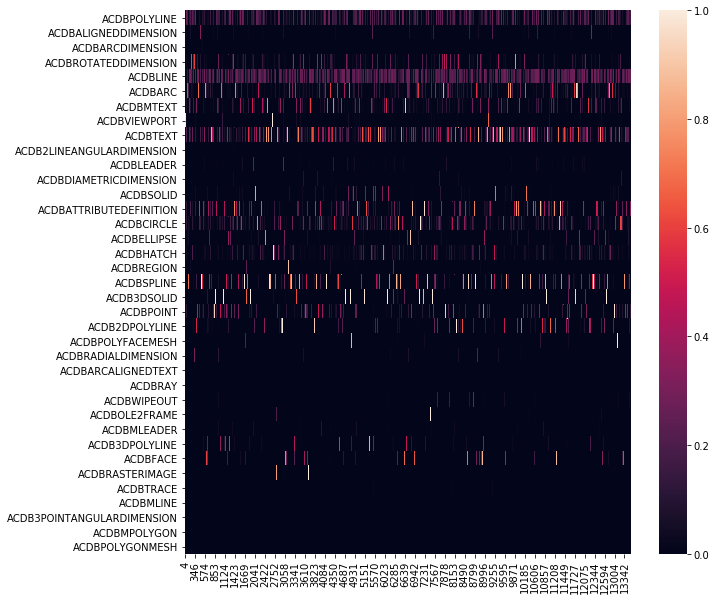

In [274]:
plt.figure(figsize=(10,10))
sns.heatmap(drawing2[(drawing2['ACDBLINE']<0.3)&(drawing2['ACDBPOLYLINE']<0.3)].T.iloc[0:37,:])